In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("data/youtoxic_english_1000.csv")
df.head(3)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False


In [7]:
# show the columns
df.columns

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')

In [60]:
# filter the categories to a new dataframe
categories_df = df[['IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism']]

categories_df.head(2)

,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,False,False


C:\Users\saman\AppData\Local\Temp\ipykernel_2608\4169057356.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_counts.index, rotation=90)
C:\Users\saman\AppData\Local\Temp\ipykernel_2608\4169057356.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure_1.show()


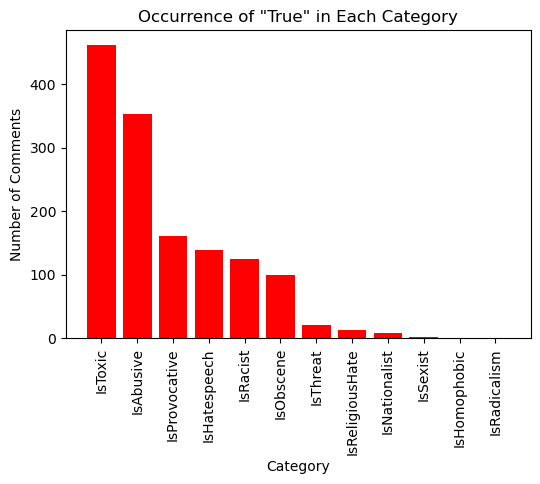

In [61]:
# sum the categories
category_counts = categories_df.sum().sort_values(ascending=False)

# set up the figure
figure_1, ax = plt.subplots(figsize=(6, 4))

# labels
ax.set_xlabel('Category')
ax.set_ylabel('Number of Comments')
ax.set_title('Occurrence of "True" in Each Category')

# bar plot
ax.bar(category_counts.index, category_counts.values, color='red')

# rotate labels
ax.set_xticklabels(category_counts.index, rotation=90)

# display the figure
figure_1.show()

In [65]:
# remove the categories that are under 100
filtered_columns = categories_df.columns[categories_df.sum() >= 100]
filtered_df = categories_df[filtered_columns]
filtered_df.head(5)

,IsToxic,IsAbusive,IsProvocative,IsObscene,IsHatespeech,IsRacist
0,False,False,False,False,False,False
1,True,True,False,False,False,False
2,True,True,False,True,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [73]:
# correlation table
corr = filtered_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,IsToxic,IsAbusive,IsProvocative,IsObscene,IsHatespeech,IsRacist
IsToxic,1.000000,0.797086,0.472718,0.359707,0.431774,0.407869
IsAbusive,0.797086,1.000000,0.593057,0.451277,-0.119603,-0.121005
IsProvocative,0.472718,0.593057,1.000000,0.089788,-0.072719,-0.075072
IsObscene,0.359707,0.451277,0.089788,1.000000,-0.027061,-0.035277
IsHatespeech,0.431774,-0.119603,-0.072719,-0.027061,1.000000,0.944637
IsRacist,0.407869,-0.121005,-0.075072,-0.035277,0.944637,1.000000
